# Prediction Salary of Adults using ML
 
 prediction task is to determine whether a person makes over 50k a year
 source : https://archive.ics.uci.edu/ml/machine-learning-databases/adult/

In [1]:
## load EDA
import pandas as pd
import numpy as np

In [2]:
#Load Ml Pkgs
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

In [3]:
column_names = ["age","workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","class"]

In [4]:
df = pd.read_csv(r'E:\Machine learning practice\adult.data', names = column_names)

In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')

In [7]:
df.shape

(32561, 15)

In [8]:


df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object

In [9]:
df.dtypes[df.dtypes == 'object']

workclass         object
education         object
marital-status    object
occupation        object
relationship      object
race              object
sex               object
native-country    object
class             object
dtype: object

In [10]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [11]:
d = {v: k for k, v in enumerate(set(df['workclass'].unique()))}

In [12]:
d

{' Self-emp-not-inc': 0,
 ' Local-gov': 1,
 ' State-gov': 2,
 ' Without-pay': 3,
 ' Self-emp-inc': 4,
 ' Federal-gov': 5,
 ' Private': 6,
 ' ?': 7,
 ' Never-worked': 8}

In [13]:
#function to assaign numbers to unique values
def generate_dict(data):
    my_dict = {v : k for k , v in enumerate (set(data))}
    return my_dict

In [14]:
generate_dict(df['education'].unique())

{' 5th-6th': 0,
 ' 1st-4th': 1,
 ' Assoc-voc': 2,
 ' 12th': 3,
 ' 7th-8th': 4,
 ' Bachelors': 5,
 ' 11th': 6,
 ' Doctorate': 7,
 ' Some-college': 8,
 ' 10th': 9,
 ' Prof-school': 10,
 ' Preschool': 11,
 ' HS-grad': 12,
 ' 9th': 13,
 ' Masters': 14,
 ' Assoc-acdm': 15}

In [15]:
obj_list = ["workclass", "education","marital-status","occupation", "relationship","race","sex","native-country","class"]
obj_names = ["d_workclass", "d_education","d_marital_status","d_occupation", "d_relationship","d_race","d_sex","d_native_country","d_class"]
for i,j in zip(obj_names, obj_list):
    print('{} = generate_dict(df["{}"].unique())'.format (i,j))

d_workclass = generate_dict(df["workclass"].unique())
d_education = generate_dict(df["education"].unique())
d_marital_status = generate_dict(df["marital-status"].unique())
d_occupation = generate_dict(df["occupation"].unique())
d_relationship = generate_dict(df["relationship"].unique())
d_race = generate_dict(df["race"].unique())
d_sex = generate_dict(df["sex"].unique())
d_native_country = generate_dict(df["native-country"].unique())
d_class = generate_dict(df["class"].unique())


In [16]:
d_workclass = generate_dict(df["workclass"].unique())
d_education = generate_dict(df["education"].unique())
d_marital_status = generate_dict(df["marital-status"].unique())
d_occupation = generate_dict(df["occupation"].unique())
d_relationship = generate_dict(df["relationship"].unique())
d_race = generate_dict(df["race"].unique())
d_sex = generate_dict(df["sex"].unique())
d_native_country = generate_dict(df["native-country"].unique())
d_class = generate_dict(df["class"].unique())

In [17]:
d_workclass

{' Self-emp-not-inc': 0,
 ' Local-gov': 1,
 ' State-gov': 2,
 ' Without-pay': 3,
 ' Self-emp-inc': 4,
 ' Federal-gov': 5,
 ' Private': 6,
 ' ?': 7,
 ' Never-worked': 8}

In [18]:
df2 = df

In [19]:
df2.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [20]:
df2["workclass"] = df2["workclass"].map(d_workclass)
df2["education"] = df2["education"].map(d_education)
df2["marital-status"] = df2["marital-status"].map(d_marital_status)
df2["occupation"] = df2["occupation"].map(d_occupation)
df2["relationship"] = df2["relationship"].map(d_relationship)
df2["race"] = df2["race"].map(d_race)
df2["sex"] = df2["sex"].map(d_sex)
df2["native-country"] = df2["native-country"].map(d_native_country)
df2["class"] = df2["class"].map(d_class)

In [21]:
df2.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,2,77516,5,13,3,13,4,1,0,2174,0,40,11,0
1,50,0,83311,5,13,1,8,5,1,0,0,0,13,11,0
2,38,6,215646,12,9,4,4,4,1,0,0,0,40,11,0
3,53,6,234721,6,7,1,4,5,2,0,0,0,40,11,0
4,28,6,338409,5,13,1,0,2,2,1,0,0,40,41,0
5,37,6,284582,14,14,1,8,2,1,1,0,0,40,11,0
6,49,6,160187,13,5,2,12,4,2,1,0,0,16,29,0
7,52,0,209642,12,9,1,8,5,1,0,0,0,45,11,1
8,31,6,45781,14,14,3,0,4,1,1,14084,0,50,11,1
9,42,6,159449,5,13,1,8,5,1,0,5178,0,40,11,1


In [22]:
df2.dtypes

age               int64
workclass         int64
fnlwgt            int64
education         int64
education-num     int64
marital-status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
capital-gain      int64
capital-loss      int64
hours-per-week    int64
native-country    int64
class             int64
dtype: object

In [23]:
#loading data visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
#Correlation Plot
corr_mat = df2.corr()

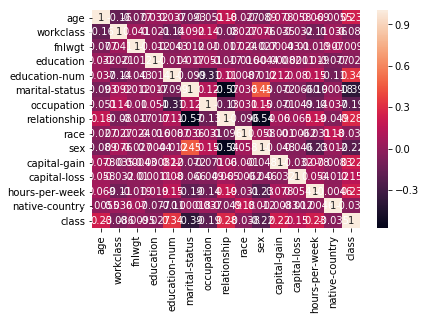

In [25]:
#Plot with Seaborn
sns.heatmap(corr_mat,annot = True)

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1440x720 with 0 Axes>

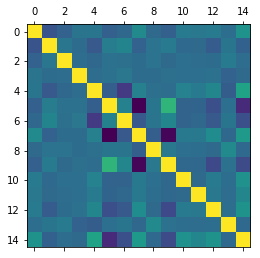

In [26]:
#Plot with Matplotlib
plt.figure(figsize = (20,10))
plt.matshow(corr_mat)
plt.show

In [27]:
df['class'].value_counts()

0    24720
1     7841
Name: class, dtype: int64

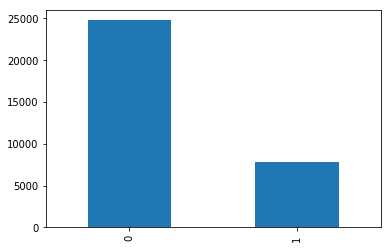

In [28]:
df['class'].value_counts().plot(kind = "bar")

In [29]:
df2.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')

In [30]:
df2.shape

(32561, 15)

In [31]:
df2.iloc[:,0:14].columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [32]:
df2.iloc[:,14].name

'class'

In [33]:
x = df2.iloc[:,0:14].values
y = df2.iloc[:,14].values

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33, random_state = 42)

In [35]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
print(x_train.shape)
print(y_train.shape)

(21815, 14)
(21815,)


# using logistic regression

In [37]:
logit = LogisticRegression()
logit.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [38]:
#Accuracy of our model
logit.score(x_test,y_test)

0.8102549785966872

In [39]:
#Saving our model
from sklearn.externals import joblib

In [40]:
salary_logit_model = open("salary_logit_model.pkl", "wb")
joblib.dump(logit, salary_logit_model)

In [41]:
salary_logit_model.close()

# Using Naive Bayes



In [42]:
nv = MultinomialNB()
nv.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [43]:
nv.score(x_test,y_test)

0.7863391029220175

In [44]:
salary_nv_model = open("salary_nv_model.pkl", "wb")
joblib.dump(nv, salary_nv_model)

In [45]:
salary_nv_model.close()

# Using Random Forest

In [46]:
rf = RandomForestClassifier(n_estimators=100, max_depth=4)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [47]:

rf.score(x_test, y_test)

0.8486878838637633

In [48]:
#save model
salary_rf_model = open("salary_rf_model.pkl", "wb")
joblib.dump(rf, salary_rf_model)

In [49]:
salary_rf_model.close()

# Cross Validation

In [50]:
cv_scores = cross_val_score(LogisticRegression(),x,y,cv=10)


In [51]:
print (cv_scores)

[0.80319312 0.8046683  0.8009828  0.81019656 0.81019656 0.81296069
 0.79883292 0.80988943 0.81142506 0.80436118]


In [52]:
print(np.mean(cv_scores))

0.8066706636018885


In [53]:
#LogisticRegression model gave us 0.79 accuracy

In [54]:
cv_scores2 = cross_val_score(RandomForestClassifier(n_estimators = 100, max_depth = 2), x,y, cv = 10)

In [55]:
print (cv_scores2)

[0.80564937 0.80620393 0.79361179 0.79023342 0.79914005 0.80036855
 0.79576167 0.80958231 0.80006143 0.7985258 ]


In [56]:
#Find the mean of the scores
print(np.mean(cv_scores2))

0.7999138314075372


In [57]:
#Random forest model gave us 0.79 accuracy

In [58]:
#cross validation with a change in parameters
cv_score3 = cross_val_score(RandomForestClassifier(n_estimators=100, max_depth = 4 ), x,y,cv = 10)

In [59]:
print(np.mean(cv_score3))

0.8480393109077481


In [60]:
#After tuning parameters we got 0.84 accuracy with random forest classifier test